<a href="https://colab.research.google.com/github/hug902/Data-Analysis-Dashboard/blob/main/Superstore_Sales_Dashboard_%26_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLEANING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data from csv
df=pd.read_csv('/content/drive/MyDrive/data/superstore_orders.csv')
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6810,6811,CA-2018-156237,14/09/2018,15/09/2018,First Class,PS-18760,Pamela Stobb,Consumer,United States,Philadelphia,...,19140.0,East,TEC-MA-10002930,Technology,Machines,Ricoh - Ink Collector Unit for GX3000 Series P...,12.585,1,0.7,-18.0385
891,892,CA-2018-133256,26/06/2018,27/06/2018,First Class,TH-21550,Tracy Hopkins,Home Office,United States,Detroit,...,48227.0,Central,OFF-PA-10001622,Office Supplies,Paper,"Ampad Poly Cover Wirebound Steno Book, 6"" x 9""...",4.540,1,0.0,2.0430
7449,7450,CA-2018-105669,17/09/2018,22/09/2018,Second Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Houston,...,77036.0,Central,OFF-AR-10000390,Office Supplies,Art,Newell Chalk Holder,9.912,3,0.2,3.2214
9068,9069,CA-2017-106278,02/09/2017,05/09/2017,Second Class,BM-11140,Becky Martin,Consumer,United States,Des Moines,...,98198.0,West,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",215.976,3,0.2,-2.6997
8433,8434,US-2015-127635,14/09/2015,18/09/2015,Second Class,SC-20260,Scott Cohen,Corporate,United States,Corpus Christi,...,78415.0,Central,OFF-PA-10004610,Office Supplies,Paper,Xerox 1900,6.848,2,0.2,2.1400


In [3]:
# describe data
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:

# check for missing values in each column
print(df.isnull().sum())


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


In [5]:
# find the city that has NaN postal code
df[df['Postal Code'].isnull()]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


In [6]:
# Replace NaN by 5401 as this is postal code of Burlington city
df['Postal Code'].fillna(5401, inplace=True)

In [7]:
# Check again for missing data
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [8]:
# check data type for each column
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [9]:

# Convert 'Order Date' and 'Ship Date' to datetime objects with the specified format

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

print(df.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


#  VISUALIZATION

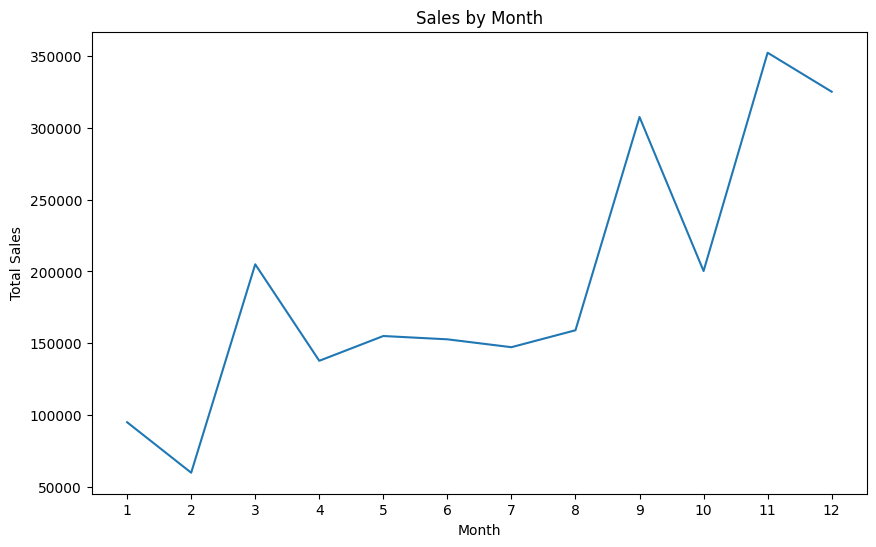

In [49]:
#SALES BY MONTH

# Create 'Month' column
df['Month'] = df['Order Date'].dt.month

# Group by month and sum sales
monthly_sales = df.groupby('Month')['Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.xticks(range(1, 13))  # Set x-axis ticks to months 1-12
plt.show()

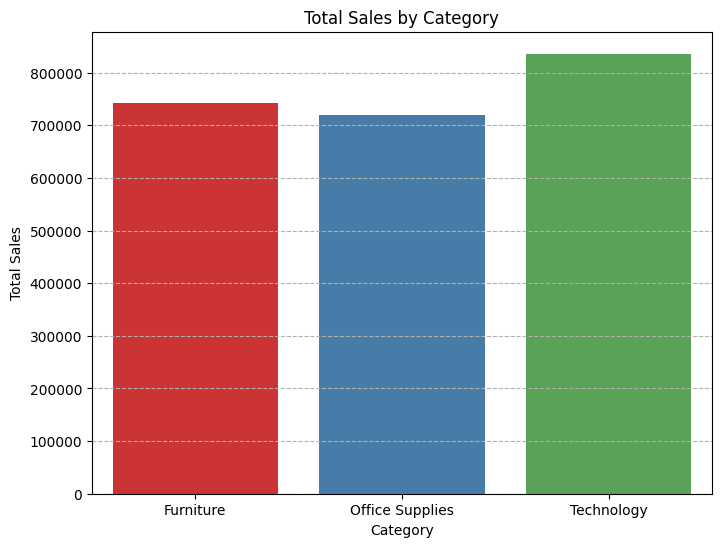

In [19]:
## Sale by category

# Group by category and sum sales
category_sales = df.groupby('Category')['Sales'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Set1')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.grid(linestyle = '--', axis ='y')
plt.show()


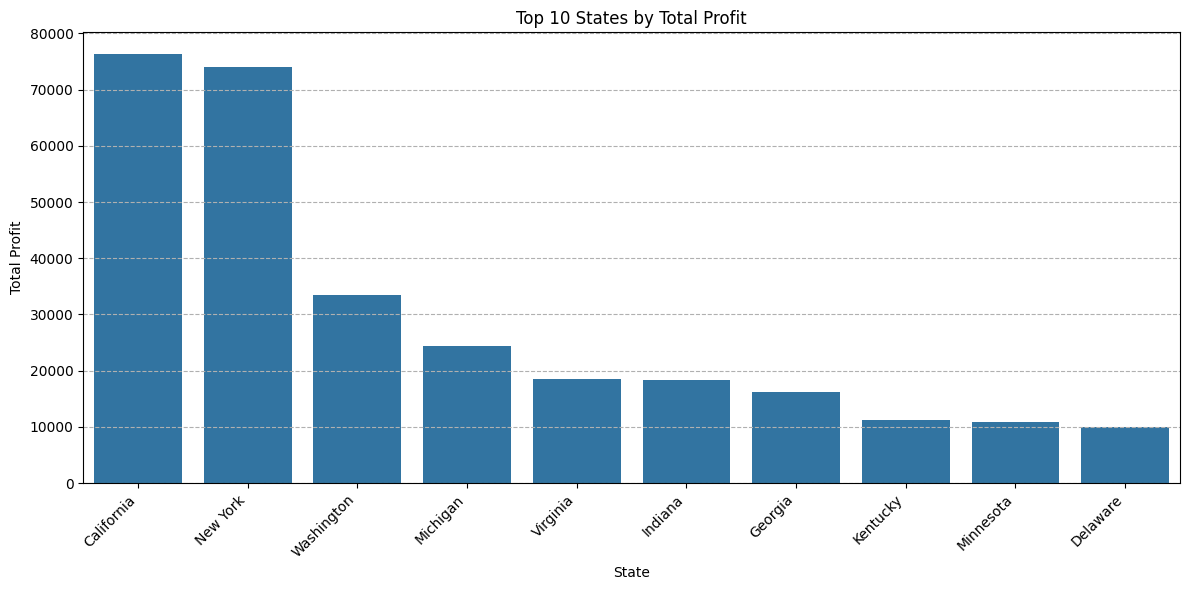

In [21]:
## Top 10 States by Total profit

# Group by state and sum profits
state_profits = df.groupby('State')['Profit'].sum()

# Sort states by profit in descending order
state_profits = state_profits.sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_profits.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values)
plt.grid(linestyle = '--', axis ='y')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('Top 10 States by Total Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


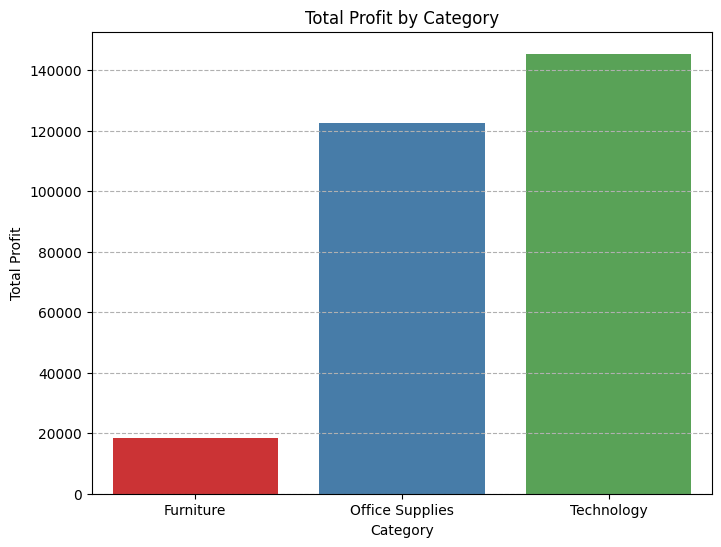

In [22]:
## Profit by category
# Group by category and sum profits
category_profits = df.groupby('Category')['Profit'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_profits.index, y=category_profits.values, palette= 'Set1')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')
plt.grid(linestyle = '--', axis ='y')
plt.show()


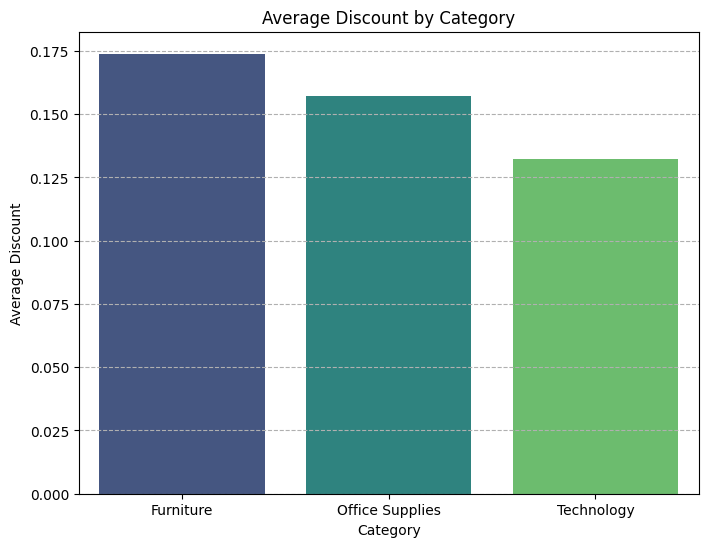

In [34]:
# Bar chart Average discount by category
category_discount = df.groupby('Category')['Discount'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_discount.index, y=category_discount.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Average Discount')
plt.title('Average Discount by Category')
plt.grid(linestyle = '--', axis ='y')
plt.show()


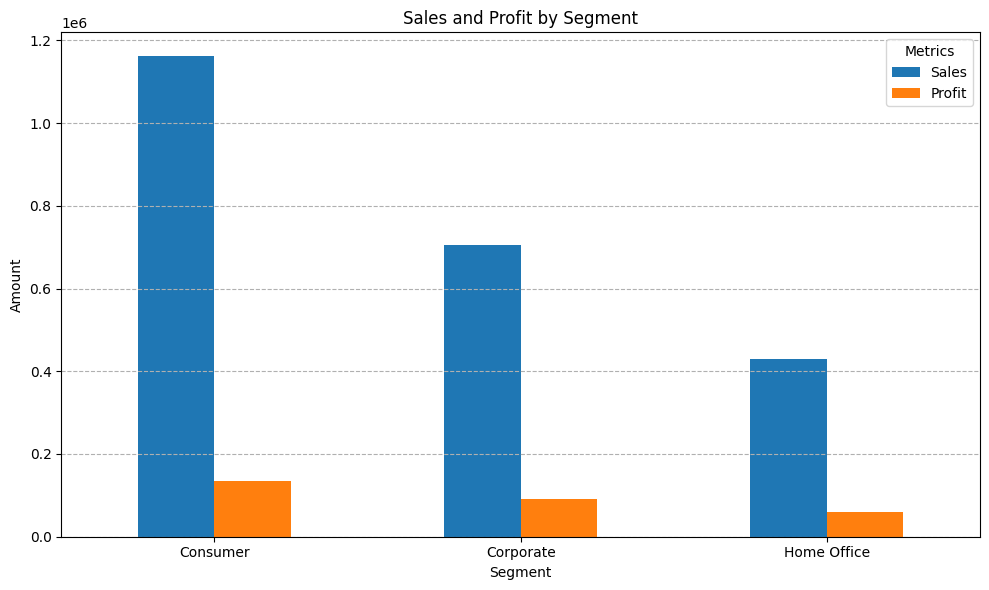

In [50]:
# SALES AND PROFIT BY SEGMENT

# Group data by segment and calculate total sales and profit
segment_sales_profit = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Create the double bar chart
segment_sales_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


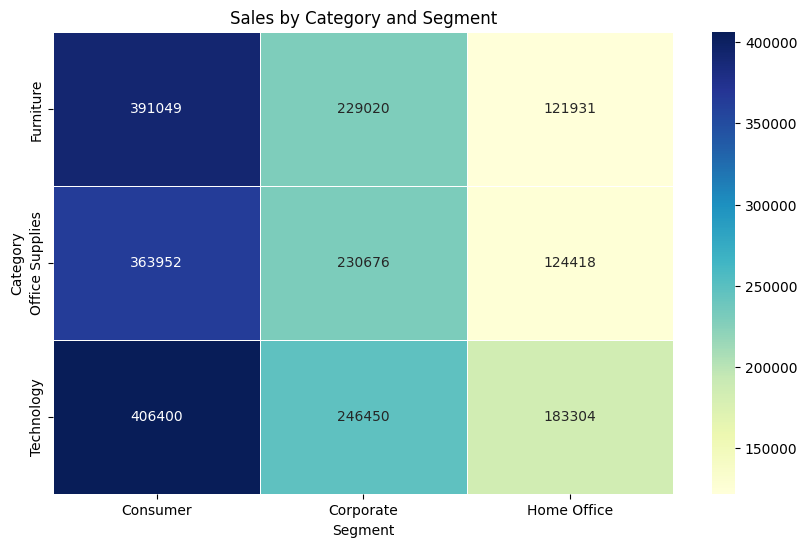

In [51]:
# SALES BY CATEGORY AND SEGMENT

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df.groupby(['Category', 'Segment'])['Sales'].sum().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Sales by Category and Segment')
plt.xlabel('Segment')
plt.ylabel('Category')
plt.show()

**CORRELATION HEATMAP**




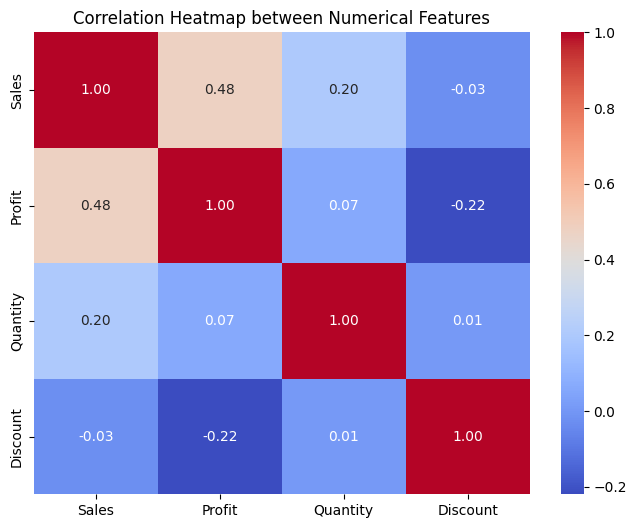

In [57]:

numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

# Correlation caculate
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Numerical Features")
plt.show()